# Importing Libraries

In [2]:
import pandas as pd
import numpy as np #linear algebra
import matplotlib.pyplot as plt ##data visualization
import seaborn as sns

In [4]:
from warnings import filterwarnings ##filters all warnings 
filterwarnings('ignore')

## Load the Data

In [5]:
df=pd.read_csv("C:/Users/RDX/Desktop/Varun/train_MpHjUjU.csv")
df.sample(n=10)

,MMM-YY,Emp_ID,Age,Gender,City,Education_Level,Salary,Dateofjoining,LastWorkingDate,Joining Designation,Designation,Total Business Value,Quarterly Rating,Target
7546,01-01-2016,1123,42,Female,C20,Bachelor,55112,4/30/2013,NaN,1,2,619250,2,NO
13230,06-01-2016,1968,38,Male,C15,Bachelor,55836,7/13/2015,NaN,1,1,136170,2,NO
5497,08-01-2016,820,38,Male,C14,Master,59166,5/23/2015,NaN,1,1,116520,3,NO
11362,02-01-2017,1680,31,Female,C9,Bachelor,65299,01-04-2017,NaN,2,2,300000,1,NO
3292,04-01-2017,489,31,Female,C12,Master,49475,10/18/2016,NaN,1,1,670210,3,NO
13331,07-01-2016,1983,49,Female,C23,Master,76531,07-02-2015,NaN,1,2,151160,1,NO
2629,04-01-2016,402,44,Male,C24,Master,91279,11/29/2012,NaN,1,3,579510,4,NO
9658,06-01-2017,1432,33,Male,C26,College,29365,10/13/2015,NaN,1,2,1059270,3,NO
11779,10-01-2016,1746,50,Female,C12,Master,38478,9/24/2015,NaN,1,2,104100,1,NO
7005,02-01-2016,1050,30,Female,C28,Bachelor,31915,01-07-2015,NaN,1,1,844160,4,NO


In [6]:
df.shape

(19104, 14)

**Exploring the no. of variables and datatypes**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   MMM-YY                19104 non-null  object
 1   Emp_ID                19104 non-null  int64 
 2   Age                   19104 non-null  int64 
 3   Gender                19104 non-null  object
 4   City                  19104 non-null  object
 5   Education_Level       19104 non-null  object
 6   Salary                19104 non-null  int64 
 7   Dateofjoining         19104 non-null  object
 8   LastWorkingDate       1616 non-null   object
 9   Joining Designation   19104 non-null  int64 
 10  Designation           19104 non-null  int64 
 11  Total Business Value  19104 non-null  int64 
 12  Quarterly Rating      19104 non-null  int64 
 13  Target                19104 non-null  object
dtypes: int64(7), object(7)
memory usage: 1.5+ MB


**Changing the object type to Date Datatype**

In [8]:
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Emp_ID                19104 non-null  int64         
 2   Age                   19104 non-null  int64         
 3   Gender                19104 non-null  object        
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  object        
 6   Salary                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   object        
 9   Joining Designation   19104 non-null  int64         
 10  Designation           19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  Target          

**Grouping the features based on Emp_ID**

As there are same no. of Emp_ID in the data, We will use Groupby to group the same data points

In [10]:
g=df.groupby('Emp_ID')['Emp_ID','Age','Gender','City','Education_Level','Salary','Joining Designation','Designation',
                       'Quarterly Rating','Target'].tail(1)
g.reset_index(drop=True,inplace=True)
gg=df.groupby('Emp_ID').agg({'Total Business Value':'sum'})
gg.reset_index(drop=True,inplace=True)
df1=pd.concat([g,gg],axis=1,ignore_index=False)

**Insight of the Response Variable**

In [11]:
df1['Target'].value_counts()

YES    1616
NO      765
Name: Target, dtype: int64

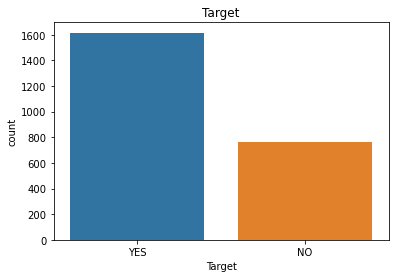

In [12]:
sns.countplot(df1['Target'])
plt.title('Target')
plt.show()

**The above plot shows the probability of haapening of the event**

## Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label=LabelEncoder()
df1['Target']=label.fit_transform(df1['Target'])

In [13]:
df1['Target'].value_counts()

1    1616
0     765
Name: Target, dtype: int64

In [14]:
df1['Gender']=label.fit_transform(df1['Gender'])
df1['City']=label.fit_transform(df1['City'])
df1['Education_Level']=label.fit_transform(df1['Education_Level'])


**Extracting the numerical features from the Data**

In [15]:
numerical=df1[['Age','City','Salary','Total Business Value']]
numerical

,Age,City,Salary,Total Business Value
0,28,15,57387,1715580
1,31,26,67016,0
2,43,4,65603,350000
3,29,28,46368,120360
4,31,2,78728,1265000
...,...,...,...,...
2376,34,16,82815,21748820
2377,34,28,12105,0
2378,45,10,35370,2815090
2379,28,12,69498,977830


## StandardScaler 

**Standardizing the numerical features using StandardScaler**

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
numerical=scaler.fit_transform(numerical)
numerical

array([[-0.94668243,  0.1121955 , -0.06861573, -0.31464103],
       [-0.44518787,  1.44545878,  0.27069993, -0.50264571],
       [ 1.56079034, -1.22106779,  0.22090732, -0.46429038],
       ...,
       [ 1.89512005, -0.49383327, -0.84447128, -0.1941494 ],
       [-0.94668243, -0.25142176,  0.35816296, -0.39548858],
       [-0.61235272,  0.59701851,  0.38480359, -0.25078927]])

**After applying Standard scaler the values will be tranformed between the range (-1 to 1) and stored in an array.To do further process need to convert array into DataFrame**

In [18]:
numerical=pd.DataFrame(numerical,columns=['Age','City','Salary','Total Business Value'])
numerical

,Age,City,Salary,Total Business Value
0,-0.946682,0.112195,-0.068616,-0.314641
1,-0.445188,1.445459,0.270700,-0.502646
2,1.560790,-1.221068,0.220907,-0.464290
3,-0.779518,1.687870,-0.456914,-0.489456
4,-0.445188,-1.463479,0.683418,-0.364019
...,...,...,...,...
2376,0.056307,0.233401,0.827440,1.880735
2377,0.056307,1.687870,-1.664305,-0.502646
2378,1.895120,-0.493833,-0.844471,-0.194149
2379,-0.946682,-0.251422,0.358163,-0.395489


In [19]:
df2=df1.drop(['Age','City','Salary','Total Business Value'],axis=1)
df2=pd.DataFrame(df2)
df2

,Emp_ID,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
0,1,1,2,1,1,2,1
1,2,1,2,2,2,1,0
2,4,1,2,2,2,1,1
3,5,1,1,1,1,1,1
4,6,0,0,3,3,2,0
...,...,...,...,...,...,...,...
2376,2784,1,1,2,3,4,0
2377,2785,0,1,1,1,1,1
2378,2786,1,1,2,2,1,1
2379,2787,0,2,1,1,1,1


**Creating a new DataFrame using Standardized variables and the Categorical variables**

In [20]:
df3=pd.concat([numerical,df2],axis=1)
df3

,Age,City,Salary,Total Business Value,Emp_ID,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
0,-0.946682,0.112195,-0.068616,-0.314641,1,1,2,1,1,2,1
1,-0.445188,1.445459,0.270700,-0.502646,2,1,2,2,2,1,0
2,1.560790,-1.221068,0.220907,-0.464290,4,1,2,2,2,1,1
3,-0.779518,1.687870,-0.456914,-0.489456,5,1,1,1,1,1,1
4,-0.445188,-1.463479,0.683418,-0.364019,6,0,0,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...
2376,0.056307,0.233401,0.827440,1.880735,2784,1,1,2,3,4,0
2377,0.056307,1.687870,-1.664305,-0.502646,2785,0,1,1,1,1,1
2378,1.895120,-0.493833,-0.844471,-0.194149,2786,1,1,2,2,1,1
2379,-0.946682,-0.251422,0.358163,-0.395489,2787,0,2,1,1,1,1


**SMOTE**

**The no. of records where the target variable is 0 is less, we use smote technique to balance the data**

In [21]:
not_default = df3[df3.Target==0]
len(not_default)

765

In [22]:
default = df3[df3.Target==1] 
len(default)

1616

In [23]:
from sklearn.utils import resample
default_upsampled = resample(default,
                          replace=True, # sample with replacement
                          n_samples=len(not_default), # match number in majority class, ie 11
                          random_state=27) # reproducible results
default_upsampled

,Age,City,Salary,Total Business Value,Emp_ID,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
1562,-0.946682,1.445459,-1.312268,-0.491470,1838,0,2,1,1,1,1
823,1.393625,-0.251422,0.534992,-0.099789,965,1,2,1,2,1,1
1141,0.390636,0.475813,0.566742,0.389104,1343,0,0,2,3,1,1
1951,-0.445188,-0.251422,-0.654533,-0.480492,2288,1,1,1,1,1,1
1570,0.892131,0.960636,-0.628316,-0.502646,1846,0,0,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1026,-0.946682,0.233401,-0.099943,-0.502646,1207,1,1,2,2,1,1
1702,0.223472,1.324253,1.391474,2.178054,2002,1,0,2,4,1,1
309,-1.113847,-1.221068,-0.831891,-0.452656,364,1,2,1,1,1,1
1111,0.390636,0.839430,-0.046063,-0.502646,1308,1,1,3,3,1,1


**Creating a new DataFrame by concatenating the sampled values**

In [24]:
new_df = pd.concat([not_default, default_upsampled]) 
new_df

,Age,City,Salary,Total Business Value,Emp_ID,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
1,-0.445188,1.445459,0.270700,-0.502646,2,1,2,2,2,1,0
4,-0.445188,-1.463479,0.683418,-0.364019,6,0,0,3,3,2,0
6,-0.946682,-0.493833,-0.604776,-0.502646,11,0,2,1,1,1,0
9,0.892131,0.475813,-1.395467,-0.502646,14,0,1,3,3,1,0
17,-0.445188,0.233401,1.506212,3.480951,25,1,0,1,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...
1026,-0.946682,0.233401,-0.099943,-0.502646,1207,1,1,2,2,1,1
1702,0.223472,1.324253,1.391474,2.178054,2002,1,0,2,4,1,1
309,-1.113847,-1.221068,-0.831891,-0.452656,364,1,2,1,1,1,1
1111,0.390636,0.839430,-0.046063,-0.502646,1308,1,1,3,3,1,1


In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 1 to 645
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1530 non-null   float64
 1   City                  1530 non-null   float64
 2   Salary                1530 non-null   float64
 3   Total Business Value  1530 non-null   float64
 4   Emp_ID                1530 non-null   int64  
 5   Gender                1530 non-null   int32  
 6   Education_Level       1530 non-null   int32  
 7   Joining Designation   1530 non-null   int64  
 8   Designation           1530 non-null   int64  
 9   Quarterly Rating      1530 non-null   int64  
 10  Target                1530 non-null   int32  
dtypes: float64(4), int32(3), int64(4)
memory usage: 125.5 KB


## Insights of each variable

**Emp_ID**

In [26]:
new_df['Emp_ID'].value_counts()

1834    3
1795    3
1491    3
1580    3
364     3
       ..
2651    1
602     1
599     1
2646    1
2552    1
Name: Emp_ID, Length: 1372, dtype: int64

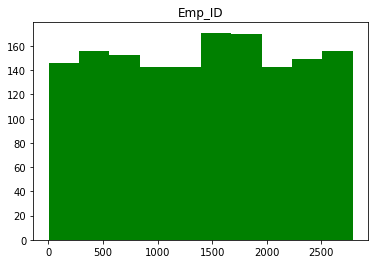

In [121]:
plt.hist(new_df['Emp_ID'],color='green')
plt.title('Emp_ID')
plt.show()

Above histogram shows the distribution of each data points in that variable.

**AGE**

In [28]:
new_df['Age'].value_counts()

 0.056307    106
-0.445188    104
-0.278023    102
 0.223472    100
-0.612353     99
 0.390636     93
-0.779518     89
-0.110858     88
-1.113847     79
 0.557801     75
-0.946682     68
 1.226461     60
 0.892131     59
 0.724966     56
-1.281012     53
 1.059296     50
-1.448177     39
 1.393625     36
 1.560790     28
-1.615342     26
 1.727955     19
 2.062285     16
-1.782507     15
 1.895120     15
 2.396615     12
 2.229450     11
 2.563779      7
 3.065274      6
 2.898109      5
 2.730944      4
-1.949672      4
 3.566769      2
-2.116836      2
 3.232439      1
 3.399604      1
Name: Age, dtype: int64

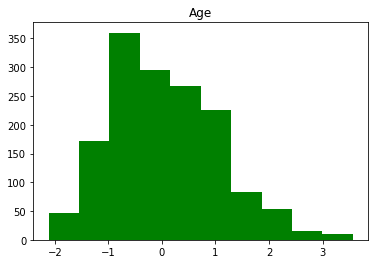

In [122]:
plt.hist(new_df['Age'],color='green')
plt.title('Age')
plt.show()

**Above histogram shows the variation in age**

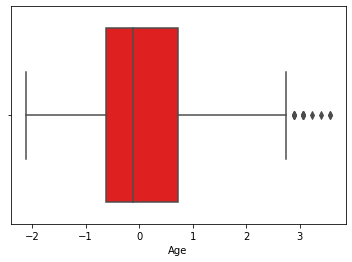

In [30]:
sns.boxplot(new_df['Age'],color='red')
plt.show()

The above boxplot shows the outliers and to check the outliers using IQR

In [135]:
iqr=new_df['Age'].quantile(0.75) - new_df['Age'].quantile(0.25)
iqr

1.3373188102675213

In [136]:
Ul=new_df['Age'].quantile(0.75) + (1.5*iqr)
Ul

2.7309443029077087

In [33]:
new_df.groupby('Target')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Target,,,,,,,,
0,765.0,0.114650,0.983022,-1.949672,-0.612353,0.056307,0.724966,3.566769
1,765.0,-0.021485,1.002047,-2.116836,-0.779518,-0.110858,0.557801,3.065274


Groupby shows the min,max,std of the age feature with respect to Target

**Gender**

In [34]:
new_df['Gender'].value_counts()

1    922
0    608
Name: Gender, dtype: int64

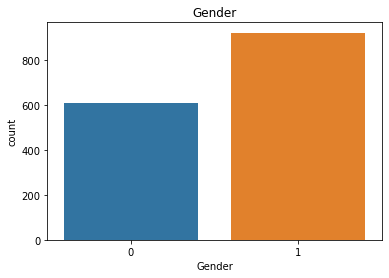

In [35]:
sns.countplot(new_df['Gender'])
plt.title('Gender')
plt.show()

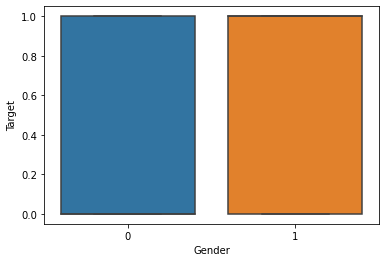

In [36]:
sns.boxplot(x=new_df['Gender'],y=new_df['Target'],data=new_df)
plt.show()

**City**

In [37]:
new_df['City'].value_counts()

-0.251422    89
 0.839430    73
 0.475813    69
-0.978656    66
 0.960636    59
 1.445459    59
 0.597019    58
-0.857451    57
-1.099862    57
 0.354607    56
-0.493833    56
 1.203047    54
-0.009010    54
 1.324253    53
-1.584685    53
-1.342274    52
 1.081842    51
-0.130216    50
 1.687870    50
 1.566665    49
 0.718224    49
-1.463479    47
 0.233401    43
-1.705891    41
-0.736245    40
-0.615039    40
 0.112195    36
-1.221068    35
-0.372628    34
Name: City, dtype: int64

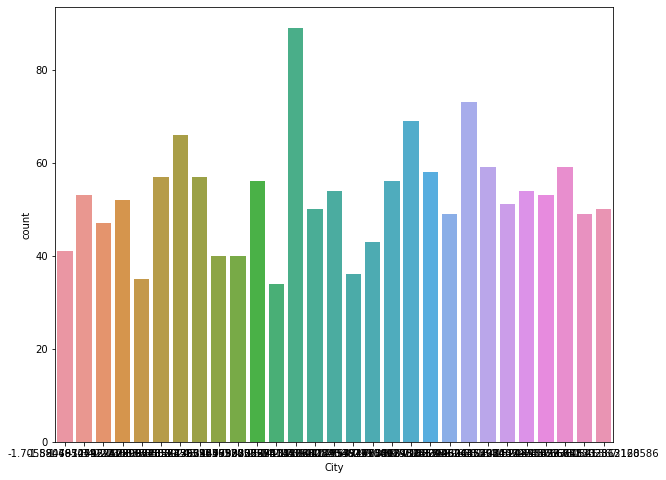

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(new_df['City'])
plt.show()

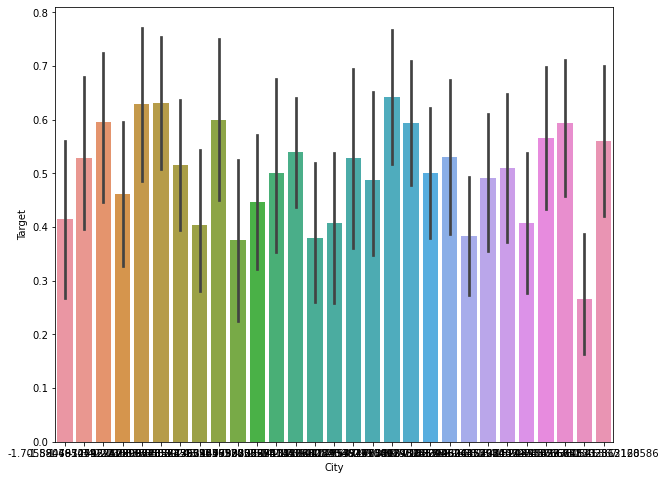

In [39]:
plt.figure(figsize=(10,8))
sns.barplot(x=new_df['City'],y=new_df['Target'],data=new_df)
plt.show()

## Splitting the variables  

In [40]:
x=new_df.drop(['Emp_ID','Target'],axis=1)
print(x)
y=new_df[['Target']]

           Age      City    Salary  Total Business Value  Gender  \
1    -0.445188  1.445459  0.270700             -0.502646       1   
4    -0.445188 -1.463479  0.683418             -0.364019       0   
6    -0.946682 -0.493833 -0.604776             -0.502646       0   
9     0.892131  0.475813 -1.395467             -0.502646       0   
17   -0.445188  0.233401  1.506212              3.480951       1   
...        ...       ...       ...                   ...     ...   
1026 -0.946682  0.233401 -0.099943             -0.502646       1   
1702  0.223472  1.324253  1.391474              2.178054       1   
309  -1.113847 -1.221068 -0.831891             -0.452656       1   
1111  0.390636  0.839430 -0.046063             -0.502646       1   
645  -0.779518  1.081842 -0.065479             -0.449122       0   

      Education_Level  Joining Designation  Designation  Quarterly Rating  
1                   2                    2            2                 1  
4                   0          

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

1147
383
1147
383


## Multiple models with different Algorithms 

### DecisionTree Classifier

In [43]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [44]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred1=model1.predict(x_test)


In [127]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [47]:
print(accuracy_score(y_test,y_pred1))

0.7127937336814621


By using Decision Tree Classifier,we got 71.279% accuracy

**Using Boosting technique in Decision Tree Classifier**

In [123]:
from sklearn.ensemble import AdaBoostClassifier

In [50]:
ABC = AdaBoostClassifier(base_estimator = model1)

In [57]:
model1_2 = GridSearchCV(ABC, param_grid=grid_params, scoring = 'roc_auc')

In [58]:
model1_2.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
             param_grid={'n_estimators': [100, 200, 300]}, scoring='roc_auc')

In [59]:
y_pred1_2=model1_2.predict(x_test)

In [60]:
print(accuracy_score(y_test,y_pred1_2))

0.6919060052219321


### RandomForest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
y_pred2=model2.predict(x_test)

In [64]:
print(accuracy_score(y_test,y_pred2))

0.7885117493472585


In [97]:
ABC_1 = AdaBoostClassifier(base_estimator = model2)

In [98]:
model2_2 = GridSearchCV(ABC_1, param_grid=grid_params, scoring = 'roc_auc')

In [99]:
model2_2.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier()),
             param_grid={'n_estimators': [100, 200, 300]}, scoring='roc_auc')

In [100]:
y_pred2_2=model2_2.predict(x_test)

In [101]:
print(accuracy_score(y_test,y_pred2_2))

0.7963446475195822


## Final Model 

### Support Vector Classifier 

In [70]:
from sklearn import svm
from sklearn.svm import SVC

In [71]:
model3=SVC(kernel='linear')
model3.fit(x_train,y_train)

SVC(kernel='linear')

**Prediction**

In [72]:
y_pred3=model3.predict(x_test)

In [73]:
print(accuracy_score(y_test,y_pred3))

0.7310704960835509


In [120]:
confusion_matrix(y_test,y_pred3)

array([[115,  74],
       [ 29, 165]], dtype=int64)

In [129]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69       189
           1       0.69      0.85      0.76       194

    accuracy                           0.73       383
   macro avg       0.74      0.73      0.73       383
weighted avg       0.74      0.73      0.73       383



**The advantages of support vector machines are: Effective in high dimensional spaces**

**Importing Test data**

In [102]:
test=pd.read_csv("C:/Users/RDX/Downloads/test_hXY9mYw.csv")
test

,Emp_ID
0,394
1,173
2,1090
3,840
4,308
...,...
736,2134
737,2255
738,448
739,1644


**Merging the data**

In [103]:
v=pd.merge(test,df3,on='Emp_ID')

In [104]:
v

,Emp_ID,Age,City,Salary,Total Business Value,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating,Target
0,394,0.056307,-0.251422,1.352747,2.506409,0,2,2,4,3,0
1,173,0.892131,0.718224,-0.111361,1.674435,1,1,1,3,3,0
2,1090,0.892131,-1.221068,1.318494,5.018603,1,1,2,4,2,0
3,840,1.059296,1.566665,1.038803,1.375016,0,1,1,4,2,0
4,308,-0.278023,1.203047,4.548777,5.856064,1,2,2,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...
736,2134,1.059296,0.839430,1.997055,6.039289,1,1,2,5,1,0
737,2255,1.059296,0.354607,2.613137,3.486099,1,1,3,4,3,0
738,448,0.557801,-1.584685,0.213366,2.819888,1,0,2,4,3,0
739,1644,2.396615,1.687870,1.627293,2.658136,0,0,2,4,1,0


In [105]:
v.shape

(741, 11)

In [106]:
v=v.drop(['Emp_ID','Target'],axis=1)

In [107]:
v.head()

,Age,City,Salary,Total Business Value,Gender,Education_Level,Joining Designation,Designation,Quarterly Rating
0,0.056307,-0.251422,1.352747,2.506409,0,2,2,4,3
1,0.892131,0.718224,-0.111361,1.674435,1,1,1,3,3
2,0.892131,-1.221068,1.318494,5.018603,1,1,2,4,2
3,1.059296,1.566665,1.038803,1.375016,0,1,1,4,2
4,-0.278023,1.203047,4.548777,5.856064,1,2,2,5,2


**Prediction of model with respect to test data**

In [131]:
test_pred=model3.predict(v)
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,

**Importing the Submission file**

In [132]:
submission=pd.read_csv('Downloads/submission.csv')

In [133]:
submission.head()

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0


In [117]:
submission['Target']=test_pred

In [118]:
submission

,Emp_ID,Target
0,394,0
1,173,0
2,1090,0
3,840,0
4,308,0
...,...,...
736,2134,0
737,2255,0
738,448,0
739,1644,0


**Exporting the submission file to the path location**

In [134]:
submission.to_csv('Downloads/submission8.csv')